In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
from tueplots import figsizes, fonts, axes, fontsizes, markers
import matplotlib.gridspec as gridspec


In [2]:
# Color
PALETTE = "deep"
sns.set_palette(sns.color_palette(PALETTE))

# Figsize
plt.rcParams.update(figsizes.aistats2023_half(tight_layout=False,
                                              height_to_width_ratio=1))  # make square fig.

# Font
plt.rcParams.update(fonts.aistats2022_tex(family="serif"))
# Font size
plt.rcParams.update(fontsizes.aistats2023(default_smaller=0))
# Axes ===
plt.rcParams.update(axes.lines(base_width=1,  # base width for line params.
                               line_base_ratio=2))  # increase only linewidth
plt.rcParams.update(axes.grid(grid_alpha=0.5))  # custom grid. alpha=0-1, for transparency
# Markers
# plt.rcParams.update({"errorbar.capsize": 2})  # error bars capsize
# plt.rcParams.update(markers.with_edge())  # set markers with black edge


In [3]:
cmap = sns.color_palette()
ova_args = {"color": cmap[0],
            "marker": "o"}
softmax_args = {"color": cmap[1],
                "marker": "s"}
hemmer_args = {"color": cmap[2],
               "marker": "d"}
oneclf_args = {"color": cmap[3],
               "marker": "p"}
best_expert_args = {"color": cmap[4],
                    "marker": "X"}

marker_size = 4
cmap = sns.color_palette()
ova_args = {"color": cmap[0],
            "marker": "o",
            "markersize": marker_size,
            "linestyle": "-"}

softmax_args = {"color": cmap[1],
                "marker": "o",
                "markersize": marker_size,
                "linestyle": "--"}

hemmer_args = {"color": cmap[2],
               "marker": "o",
               "markersize": marker_size,
               "linestyle": "-."}

oneclf_args = {"color": cmap[3],
               "marker": "o",
               "markersize": marker_size,
               "linestyle": ":"}
best_expert_args = {"color": cmap[4],
                    "marker": "o",
                    "markersize": marker_size,
                    "linestyle":(0, (5, 1))}


# Galaxy-Zoo results

## System Accuracy

In [4]:
exp_list = np.arange(2, 11)


# === system accuracy ===
# best expert ===
best_expert_sys_acc_mean = np.array([0.5100447, 0.53616065, 0.51819193, 0.7007812, 0.70267856, 0.69374996,
                                     0.7247768, 0.7645089, 0.7645089, 0.7645089])[1:] * 100

best_expert_sys_acc_std = np.array([0.00611807, 0.00228318, 0.00411435, 0.00342817, 0.00189567,
                                    0.004255, 0.00250433, 0., 0., 0.])[1:]* 100

# Hemmer baseline: all seeds ===
hemmer_sys_acc_mean = np.array([71.58482143, 71.46205357, 69.765625, 71.06026786, 69.83258929,
                                70.92633929, 69.16294643, 70.51339286, 70.94866071])
hemmer_sys_acc_std = np.array([0.22139324, 0.31498138, 0.70130682, 0.41445189, 0.66041823, 0.47906643,
                            0.6865427, 0.63640542, 0.29978518])

# surrogates ===
ova_sys_acc_mean = np.array([83.76116071, 83.31473214, 83.203125, 84.48660714, 83.53794861,
                             84.70982143, 84.65401459, 84.98883929, 83.59375, 85.15625])[1:]
ova_sys_acc_std = np.array([0.17744405, 0.13020833, 0.13413509, 0.48363059, 0.17048237, 
                            0.40283685, 0.19420213, 0.45143934, 0.34449887])

softmax_sys_acc_mean = np.array([82.84040179, 82.10100474, 78.43192101, 82.58928517, 80.97098351,
                                 81.51506833, 81.5011158, 81.52901704, 83.44029127])
softmax_sys_acc_std = np.array([0.18855222, 0.3981099, 1.46096418, 0.34474988, 1.09565563,
                                2.09583977, 1.19804452, 0.99041589, 0.80911116])

# one clf ===
oneclf_sys_ac_mean = np.array([83.19196428571429] * 9)
oneclf_sys_acc_std = np.array([0.2038167674972055] * 9)


# == ECE ===
softmax_ece_mean = np.array([0.07933515, 0.10659218, 0.10781625, 0.07871236, 0.0973568,
                             0.09041484, 0.07945532, 0.08082917, 0.07404413]) * 100
softmax_ece_std = np.array([0.00426171, 0.01214355, 0.01108441, 0.0058677, 0.00863086,
                            0.01436172, 0.00651461, 0.00562081, 0.00617377]) * 100


ova_ece_mean = np.array([0.04992214, 0.04049404, 0.03301459, 0.04660444, 0.03788753,
                         0.04424203, 0.03501259, 0.04121573, 0.0406589]) * 100
ova_ece_std = np.array([0.0078866, 0.00528534, 0.00482935, 0.0066313, 0.00369692,
                        0.0040386, 0.00549099, 0.00205388, 0.00173974]) * 100

hemmer_ece_mean = np.array([0.5147611, 0.5095685, 0.5390846, 0.5466955, 0.55980974,
                            0.5870809, 0.6037179, 0.60602885, 0.6142031]) * 100
hemmer_ece_std = np.array([0.0041707, 0.00151973, 0.00482061, 0.004094, 0.00469448, 
                           0.00361715, 0.00382214, 0.00299992, 0.00201346]) * 100


In [5]:
def addBreakClips(ax1,ax2, ax_ratio=1):
    """ Code to add diagonal slashes to truncated y-axes.
    copied from http://matplotlib.org/examples/pylab_examples/broken_axis.html"""
    
    d = .015 # how big to make the diagonal lines in axes coordinates
    
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d,+d),(-ax_ratio*d,+ax_ratio*d), **kwargs)      # top-left diagonal
    ax1.plot((1-d,1+d),(-ax_ratio*d,+ax_ratio*d), **kwargs)    # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal
    ax2.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-right diagonal
    

# System Accuracy

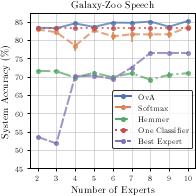

In [10]:
fig, ax = plt.subplots(1,1, figsize=(3,3), layout="tight")

# === Plots ===
# OvA
ax.errorbar(exp_list, ova_sys_acc_mean, yerr=ova_sys_acc_std,
             alpha=0.75, **ova_args)
# Softmax
ax.errorbar(exp_list, softmax_sys_acc_mean, yerr=softmax_sys_acc_std,
             alpha=0.75, **softmax_args)

# Hemmer
ax.errorbar(exp_list, hemmer_sys_acc_mean, yerr=hemmer_sys_acc_std,
             alpha=0.75, **hemmer_args)

# One Classifier
ax.errorbar(exp_list, oneclf_sys_ac_mean, yerr=oneclf_sys_acc_std,
             alpha=0.75, **oneclf_args)

# Best Expert
ax.errorbar(exp_list, best_expert_sys_acc_mean, yerr=best_expert_sys_acc_std,
             alpha=0.75, **best_expert_args)

# === ax1 lim ===
# ax1.set_ylim(75, 94)
ax.set_xticks(exp_list)
ax.set_yticks(ax.get_yticks()[:-1])
ax.set_xlabel(r"Number of Experts")

# === Grid ===
ax.grid()


# === Legend ===
ova_leg = mlines.Line2D([], [], label='OvA', **ova_args)
softmax_leg = mlines.Line2D([], [], label='Softmax', **softmax_args)
hemmer_leg = mlines.Line2D([], [], label='Hemmer', **hemmer_args)
oneclf_leg = mlines.Line2D([], [], label='One Classifier', **oneclf_args)
bestexpert_leg = mlines.Line2D([], [], label='Best Expert', **best_expert_args)
legend_list = [ova_leg, softmax_leg, hemmer_leg, oneclf_leg, bestexpert_leg]

fig.legend(handles=legend_list, loc='center', bbox_to_anchor=(0.75, 0.4), ncol=1, fancybox=True)

plt.ylabel(r"System Accuracy $(\%)$")

# # === Save ===
plt.title("Galaxy-Zoo Speech")

fig.tight_layout()
fig.savefig("galaxy_zoo_sys_acc.pdf")

# ECE

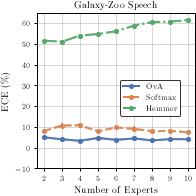

In [15]:
fig, ax = plt.subplots(1,1, figsize=(3,3), layout="tight")



# === Plots ===
# OvA
ax.errorbar(exp_list, ova_ece_mean, yerr=ova_ece_std,
                alpha=0.75, label="OvA", **ova_args)
ax.errorbar(exp_list, ova_ece_mean, yerr=ova_ece_std,
                alpha=0.75, label="OvA", **ova_args)

# Softmax
ax.errorbar(exp_list, softmax_ece_mean, yerr=softmax_ece_std,
                alpha=0.75, label="Softmax", **softmax_args)
# Softmax
ax.errorbar(exp_list, softmax_ece_mean, yerr=softmax_ece_std,
                alpha=0.75, label="Softmax", **softmax_args)

# Hemmer
ax.errorbar(exp_list, hemmer_ece_mean, yerr=hemmer_ece_std,
                alpha=0.75, label="Softmax", **hemmer_args)
ax.errorbar(exp_list, hemmer_ece_mean, yerr=hemmer_ece_std,
                alpha=0.75, label="Softmax", **hemmer_args)

# === ax1 lim ===
# ax1.set_ylim(75, 94)
ax.set_xticks(exp_list)
ax.set_yticks(ax.get_yticks()[:-1])
ax.set_xlabel(r"Number of Experts")

# === Grid ===
ax.grid()


# === Legend ===
ova_leg = mlines.Line2D([], [], label='OvA', **ova_args)
softmax_leg = mlines.Line2D([], [], label='Softmax', **softmax_args)
hemmer_leg = mlines.Line2D([], [], label='Hemmer', **hemmer_args)
legend_list = [ova_leg, softmax_leg, hemmer_leg]

fig.legend(handles=legend_list, loc='center', bbox_to_anchor=(0.74, 0.5), ncol=1, fancybox=True)

plt.ylabel(r"System Accuracy $(\%)$")
plt.ylabel(r"ECE $(\%)$")


# # === Save ===
plt.title("Galaxy-Zoo Speech")

fig.tight_layout()
fig.savefig("galaxy_zoo_ece.pdf")

# Sys & ECE

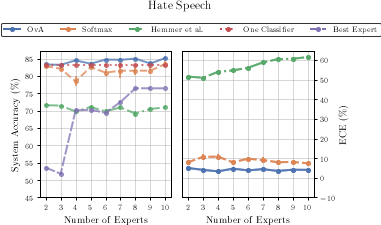

In [14]:
# fig, axs = plt.subplots(1,2, figsize=(5,3))
fig = plt.figure(1, figsize=(5,3), layout="tight")
gs1 = gridspec.GridSpec(1, 2)
axs = [fig.add_subplot(ss) for ss in gs1]
# === Sys Acc ===
# OvA
axs[0].errorbar(exp_list, ova_sys_acc_mean, yerr=ova_sys_acc_std,
             alpha=0.75, **ova_args)
# Softmax
axs[0].errorbar(exp_list, softmax_sys_acc_mean, yerr=softmax_sys_acc_std,
             alpha=0.75, **softmax_args)

# Hemmer
axs[0].errorbar(exp_list, hemmer_sys_acc_mean, yerr=hemmer_sys_acc_std,
             alpha=0.75, **hemmer_args)

# One Classifier
axs[0].errorbar(exp_list, oneclf_sys_ac_mean, yerr=oneclf_sys_acc_std,
             alpha=0.75, **oneclf_args)

# Best Expert
axs[0].errorbar(exp_list, best_expert_sys_acc_mean, yerr=best_expert_sys_acc_std,
             alpha=0.75, **best_expert_args)

# === ax1 lim ===
# ax1.set_ylim(75, 94)
axs[0].set_xticks(exp_list)
axs[0].set_yticks(axs[0].get_yticks()[:-1])
axs[0].set_xlabel(r"Number of Experts")

# === Grid ===
axs[0].grid()


# === Legend ===
ova_leg = mlines.Line2D([], [], label='OvA', **ova_args)
softmax_leg = mlines.Line2D([], [], label='Softmax', **softmax_args)
hemmer_leg = mlines.Line2D([], [], label='Hemmer', **hemmer_args)
oneclf_leg = mlines.Line2D([], [], label='One Classifier', **oneclf_args)
bestexpert_leg = mlines.Line2D([], [], label='Best Expert', **best_expert_args)
legend_list = [ova_leg, softmax_leg, hemmer_leg, oneclf_leg, bestexpert_leg]

axs[0].set_ylabel(r"System Accuracy $(\%)$")

# === ECE Plots ===
# OvA
axs[1].errorbar(exp_list, ova_ece_mean, yerr=ova_ece_std,
                alpha=0.75, label="OvA", **ova_args)
axs[1].errorbar(exp_list, ova_ece_mean, yerr=ova_ece_std,
                alpha=0.75, label="OvA", **ova_args)

# Softmax
axs[1].errorbar(exp_list, softmax_ece_mean, yerr=softmax_ece_std,
                alpha=0.75, label="Softmax", **softmax_args)
# Softmax
axs[1].errorbar(exp_list, softmax_ece_mean, yerr=softmax_ece_std,
                alpha=0.75, label="Softmax", **softmax_args)

# Hemmer
axs[1].errorbar(exp_list, hemmer_ece_mean, yerr=hemmer_ece_std,
                alpha=0.75, label="Softmax", **hemmer_args)
axs[1].errorbar(exp_list, hemmer_ece_mean, yerr=hemmer_ece_std,
                alpha=0.75, label="Softmax", **hemmer_args)

# === ax1 lim ===
# ax1.set_ylim(0, 94)
axs[1].set_xticks(exp_list)
axs[1].set_yticks(axs[1].get_yticks()[:-1])
axs[1].set_xlabel(r"Number of Experts")
axs[1].yaxis.set_label_position("right")
axs[1].set_ylabel(r"ECE $(\%)$")
axs[1].yaxis.tick_right()


# === Grid ===
axs[1].grid()


# === Legend ===
ova_leg = mlines.Line2D([], [], label='OvA', **ova_args)
softmax_leg = mlines.Line2D([], [], label='Softmax', **softmax_args)
hemmer_leg = mlines.Line2D([], [], label='Hemmer et al.', **hemmer_args)
oneclf_leg = mlines.Line2D([], [], label='One Classifier', **oneclf_args)
bestexpert_leg = mlines.Line2D([], [], label='Best Expert', **best_expert_args)
legend_list = [ova_leg, softmax_leg, hemmer_leg, oneclf_leg, bestexpert_leg]

fig.legend(handles=legend_list, loc='upper center', bbox_to_anchor=(0.53, 1), ncol=5, fancybox=True)


# # === Save ===
fig.suptitle("Hate Speech", ha="center", va="center",  x=0.5, y=1.06)
fig.tight_layout()
# fig.savefig("galaxy_zoo_draft.pdf")

# Final Plot: System Accuracy and ECE Galaxy-Zoo

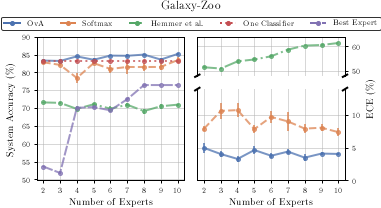

In [32]:
exp_list = np.arange(2, 11)


fig = plt.figure(figsize=(5,3), layout="tight")

ax1 = plt.subplot2grid(shape=(3, 2), loc=(0, 0), rowspan=3, colspan=1, fig=fig) 
ax3 = plt.subplot2grid(shape=(3, 2), loc=(0, 1), rowspan=1, colspan=1, fig=fig)
ax4 = plt.subplot2grid(shape=(3, 2), loc=(1, 1), rowspan=2, colspan=1, fig=fig)

# === Plots ===
# OvA
ax1.errorbar(exp_list, ova_sys_acc_mean, yerr=ova_sys_acc_std,
             alpha=0.75, **ova_args)
# Softmax
ax1.errorbar(exp_list, softmax_sys_acc_mean, yerr=softmax_sys_acc_std,
             alpha=0.75, **softmax_args)

# Hemmer
ax1.errorbar(exp_list, hemmer_sys_acc_mean, yerr=hemmer_sys_acc_std,
             alpha=0.75, **hemmer_args)

# One Classifier
ax1.errorbar(exp_list, oneclf_sys_ac_mean, yerr=oneclf_sys_acc_std,
             alpha=0.75, **oneclf_args)

# Best Expert
ax1.errorbar(exp_list, best_expert_sys_acc_mean, yerr=best_expert_sys_acc_std,
             alpha=0.75, **best_expert_args)

# === ax1 lim ===
# ax1.set_ylim(75, 92)
ax1.set_xticks(exp_list)
ax1.set_yticks(ax1.get_yticks()[1:])
ax1.set_xlabel(r"Number of Experts")

# === Grid ===
ax1.grid()


# ===============================================================================================================
# OvA
ax3.errorbar(exp_list, ova_ece_mean, yerr=ova_ece_std,
                alpha=0.75, label="OvA", **ova_args)
ax4.errorbar(exp_list, ova_ece_mean, yerr=ova_ece_std,
                alpha=0.75, label="OvA", **ova_args)

# Softmax
ax3.errorbar(exp_list, softmax_ece_mean, yerr=softmax_ece_std,
                alpha=0.75, label="Softmax", **softmax_args)
# Softmax
ax4.errorbar(exp_list, softmax_ece_mean, yerr=softmax_ece_std,
                alpha=0.75, label="Softmax", **softmax_args)

# Hemmer
ax3.errorbar(exp_list, hemmer_ece_mean, yerr=hemmer_ece_std,
                alpha=0.75, label="Softmax", **hemmer_args)
ax4.errorbar(exp_list, hemmer_ece_mean, yerr=hemmer_ece_std,
                alpha=0.75, label="Softmax", **hemmer_args)

# === remove the bottom border from the top plot and the upper border from the bottom plot ===
ax3.spines['bottom'].set_visible(False)
# === ax1.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)

# === show only top x-axis tick marks on the top plot ===
ax3.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# === show only bottom x-axis tick marks on the lower plot ===
ax4.xaxis.tick_bottom()

# === ax1 lim ===
ax3.set_ylim(48, 64)
ax3.set_xticks(exp_list)
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
# ax3.set_yticks(ax1.get_yticks()[:-1])

# === ax2 lim ===
ax4.set_ylim(0, 14)
ax4.set_xticks(exp_list)
ax4.set_xlabel(r"Number of Experts")
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
# === Grid ===
ax3.grid()
ax4.grid()

# === Legend ===
ova_leg = mlines.Line2D([], [], label='OvA', **ova_args)
softmax_leg = mlines.Line2D([], [], label='Softmax', **softmax_args)
hemmer_leg = mlines.Line2D([], [], label='Hemmer et al.', **hemmer_args)
oneclf_leg = mlines.Line2D([], [], label='One Classifier', **oneclf_args)
bestexpert_leg = mlines.Line2D([], [], label='Best Expert', **best_expert_args)
legend_list = [ova_leg, softmax_leg, hemmer_leg, oneclf_leg, bestexpert_leg]

# === Broken axes ===
addBreakClips(ax3,ax4, ax_ratio=2)


plt.gcf().text(0,0.5, r"System Accuracy $(\%)$", ha="center", va="center", rotation=90)
plt.gcf().text(1,0.55, r"ECE $(\%)$", ha="center", va="center", rotation=90)

fig.legend(handles=legend_list, loc='center', bbox_to_anchor=(0.5, 0.9), ncol=5, fancybox=True)
# # === Save ===
fig.suptitle("Galaxy-Zoo", ha="center", va="center")
fig.tight_layout()
fig.savefig("galaxyzoo.pdf")
